# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Импорт библиотек

In [55]:
import pandas as pd
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pyplot.style.use('seaborn-deep')
state = np.random.RandomState(12345)

In [56]:
def find(name, path):
    '''
    Function to find the data file stored locally.
    Takes name of the file and root directory.
    Scanes the local directory tree for the first orrurance of the file.
    '''
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)


online_path = 'datasets'
offline_path = '/home/'
files = ['gold_recovery_train_new.csv', 'gold_recovery_test_new.csv', 'gold_recovery_full_new.csv']
df_list = []

for file in files:
    try:
        df = pd.read_csv(f'/{online_path}/{file}', index_col='date', parse_dates=True)
        df_list.append(df)
    except FileNotFoundError:
        df = pd.read_csv(find(file, offline_path), index_col='date', parse_dates=True)
        df_list.append(df)
        print(f"Файл {file} найден на локальном диске.")
    else:
        print(f"Файл {file} открыт в режиме online.")

Файл gold_recovery_train_new.csv открыт в режиме online.
Файл gold_recovery_test_new.csv открыт в режиме online.
Файл gold_recovery_full_new.csv открыт в режиме online.


In [57]:
counter = 0
for file in files:
    start = "\033[1m"
    end = "\033[0;0m"
    print(
        f"Внешний вид первых пяти строк датафрейма {start}{str(file).split('.')[0].upper()}{end}:"
    )
    display(df_list[counter].head())
    print()
    print(f"Размер датафрейма {start}{str(file).split('.')[0].upper()}{end}: \
        \nколичество строк - {df_list[counter].shape[0]}, \nколичество столбцов - {df_list[counter].shape[1]}."
          )
    print()
    print(
        f"Развернутая сводка датафрейма {start}{str(file).split('.')[0].upper()}{end} \nпо наименованию столбцов, типу данных, ненулевых значениях и объему памяти:"
    )
    print()
    df_list[counter].info(show_counts=True, memory_usage='deep')
    display(df_list[counter].describe(include='all'))
    counter+=1
    print(
        '--------------------------------------------------------------------')
    print()

Внешний вид первых пяти строк датафрейма GOLD_RECOVERY_TRAIN_NEW:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,127.092,...,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,125.629,...,13.992,-505.503,11.951,-501.332,10.039,-500.170,7.985,-500.582,13.998,-599.787
2016-01-15 02:00:00,6.056,10.214,5.384,42.658,68.116,10.507,0.954,16.209,2.258,123.820,...,14.015,-502.521,11.913,-501.133,10.071,-500.129,8.014,-500.518,14.029,-601.427
2016-01-15 03:00:00,6.048,9.977,4.859,42.690,68.348,10.423,0.884,16.533,2.147,122.270,...,14.037,-500.857,12.000,-501.194,9.970,-499.202,7.977,-500.256,14.006,-599.996
2016-01-15 04:00:00,6.149,10.143,4.939,42.774,66.927,10.360,0.793,16.526,2.055,117.988,...,14.027,-499.839,11.953,-501.054,9.926,-501.687,7.894,-500.356,13.997,-601.497



Размер датафрейма GOLD_RECOVERY_TRAIN_NEW:         
количество строк - 14149, 
количество столбцов - 86.

Развернутая сводка датафрейма GOLD_RECOVERY_TRAIN_NEW 
по наименованию столбцов, типу данных, ненулевых значениях и объему памяти:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                         

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000,14148.000,13938.000,14149.000,14149.000,14149.000,14049.000,14144.000,14149.000,14129.000,...,14143.000,14148.000,14148.000,14148.000,14148.000,14148.000,14148.000,14148.000,14147.000,14148.000
mean,5.142,10.133,9.203,44.004,66.519,9.607,2.597,10.512,2.918,133.321,...,19.985,-478.697,15.487,-460.229,16.775,-483.956,13.065,-483.967,19.578,-506.798
std,1.370,1.655,2.791,4.905,10.295,2.319,0.972,3.004,0.904,39.432,...,5.658,50.736,5.256,58.844,5.832,37.893,5.766,39.208,5.764,37.079
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,...,0.000,-799.709,0.000,-799.889,-0.372,-797.142,0.646,-800.006,0.195,-809.399
25%,4.212,9.297,7.485,43.276,62.546,7.997,1.906,8.811,2.369,107.007,...,14.991,-500.629,11.895,-500.149,11.084,-500.363,8.994,-500.106,14.989,-500.745
50%,4.995,10.297,8.845,44.872,67.433,9.480,2.592,10.515,2.851,133.018,...,20.002,-499.681,14.976,-499.389,17.932,-499.702,11.998,-499.915,19.984,-500.061
75%,5.860,11.171,10.488,46.166,72.346,11.004,3.242,11.933,3.435,159.825,...,24.991,-477.472,20.059,-400.039,21.347,-487.712,17.983,-453.187,24.992,-499.536
max,16.002,17.032,18.125,52.757,100.000,19.552,5.640,22.318,8.197,250.128,...,30.116,-245.239,24.008,-145.071,43.710,-275.073,27.926,-157.396,32.189,-104.427


--------------------------------------------------------------------

Внешний вид первых пяти строк датафрейма GOLD_RECOVERY_TEST_NEW:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.801,14.993,8.080,1.005,1398.981,-500.226,1399.145,-499.920,1400.103,-500.704,...,12.024,-497.796,8.017,-501.289,7.947,-432.318,4.873,-500.037,26.706,-499.709
2016-09-01 01:59:59,215.392,14.987,8.080,0.990,1398.778,-500.057,1398.055,-499.778,1396.151,-499.240,...,12.058,-498.696,8.131,-499.634,7.958,-525.840,4.879,-500.162,25.020,-499.819
2016-09-01 02:59:59,215.260,12.885,7.787,0.996,1398.494,-500.868,1398.860,-499.765,1398.076,-502.152,...,11.962,-498.767,8.097,-500.827,8.071,-500.802,4.905,-499.829,24.995,-500.623
2016-09-01 03:59:59,215.336,12.007,7.640,0.864,1399.618,-498.864,1397.440,-499.211,1400.129,-498.356,...,12.033,-498.351,8.075,-499.474,7.897,-500.869,4.931,-499.964,24.949,-498.710
2016-09-01 04:59:59,199.099,10.683,7.530,0.806,1401.268,-500.808,1398.129,-499.505,1402.172,-500.811,...,12.025,-500.786,8.055,-500.398,8.108,-509.527,4.958,-500.360,25.003,-500.856



Размер датафрейма GOLD_RECOVERY_TEST_NEW:         
количество строк - 5290, 
количество столбцов - 52.

Развернутая сводка датафрейма GOLD_RECOVERY_TEST_NEW 
по наименованию столбцов, типу данных, ненулевых значениях и объему памяти:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000,5285.000,5290.000,5286.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,...,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000,5290.000
mean,174.840,8.684,7.266,1.384,1539.494,-497.666,1545.174,-500.273,1527.272,-498.331,...,16.320,-505.145,13.735,-463.350,12.804,-501.329,9.881,-495.663,17.305,-501.793
std,43.027,3.072,0.610,0.643,116.798,19.952,122.225,32.968,122.538,21.965,...,3.494,31.427,3.430,86.189,3.027,17.951,2.868,34.535,4.537,39.044
min,2.566,0.004,5.650,0.005,0.000,-795.316,0.000,-799.997,0.000,-799.961,...,0.000,-799.799,0.000,-800.837,0.069,-797.324,0.528,-800.220,-0.079,-809.741
25%,147.121,6.490,6.890,0.908,1498.936,-500.357,1498.971,-500.703,1473.230,-501.018,...,14.036,-500.868,12.029,-500.323,10.915,-500.727,8.037,-500.195,13.997,-500.691
50%,177.828,8.052,7.250,1.198,1585.129,-499.969,1595.622,-500.029,1549.595,-500.018,...,17.008,-500.116,14.965,-499.577,12.954,-499.990,10.004,-499.991,16.015,-500.007
75%,208.125,10.028,7.600,1.798,1602.077,-499.569,1602.324,-499.293,1601.144,-498.994,...,18.039,-499.404,15.962,-400.934,15.098,-499.283,11.997,-499.720,21.020,-499.373
max,265.983,40.000,15.500,4.102,2103.104,-57.195,1813.084,-142.527,1715.054,-150.937,...,30.052,-401.565,31.270,-6.507,25.259,-244.484,14.087,-137.740,26.706,-123.307


--------------------------------------------------------------------

Внешний вид первых пяти строк датафрейма GOLD_RECOVERY_FULL_NEW:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,127.092,...,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,125.629,...,13.992,-505.503,11.951,-501.332,10.039,-500.170,7.985,-500.582,13.998,-599.787
2016-01-15 02:00:00,6.056,10.214,5.384,42.658,68.116,10.507,0.954,16.209,2.258,123.820,...,14.015,-502.521,11.913,-501.133,10.071,-500.129,8.014,-500.518,14.029,-601.427
2016-01-15 03:00:00,6.048,9.977,4.859,42.690,68.348,10.423,0.884,16.533,2.147,122.270,...,14.037,-500.857,12.000,-501.194,9.970,-499.202,7.977,-500.256,14.006,-599.996
2016-01-15 04:00:00,6.149,10.143,4.939,42.774,66.927,10.360,0.793,16.526,2.055,117.988,...,14.027,-499.839,11.953,-501.054,9.926,-501.687,7.894,-500.356,13.997,-601.497



Размер датафрейма GOLD_RECOVERY_FULL_NEW:         
количество строк - 19439, 
количество столбцов - 86.

Развернутая сводка датафрейма GOLD_RECOVERY_FULL_NEW 
по наименованию столбцов, типу данных, ненулевых значениях и объему памяти:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                           

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000,19438.000,19228.000,19439.000,19439.000,19438.000,19338.000,19433.000,19439.000,19415.000,...,19433.000,19438.000,19438.000,19438.000,19438.000,19438.000,19438.000,19438.000,19437.000,19438.000
mean,5.168,9.979,9.501,44.077,67.050,9.689,2.706,10.584,3.042,144.625,...,18.988,-485.895,15.010,-461.079,15.694,-488.684,12.198,-487.150,18.959,-505.436
std,1.372,1.669,2.788,5.130,10.126,2.329,0.949,2.869,0.923,44.464,...,5.411,47.759,4.890,67.406,5.511,34.533,5.333,38.347,5.550,37.689
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,...,0.000,-799.799,0.000,-800.837,-0.372,-797.324,0.528,-800.220,-0.079,-809.741
25%,4.251,9.137,7.723,43.402,63.300,8.063,2.040,8.939,2.461,114.107,...,14.976,-500.705,11.940,-500.188,10.989,-500.458,8.971,-500.129,14.983,-500.728
50%,5.066,10.102,9.219,45.011,68.173,9.744,2.749,10.622,2.985,143.232,...,18.017,-499.838,14.971,-499.460,15.000,-499.803,11.019,-499.935,19.961,-500.048
75%,5.896,11.036,10.948,46.275,72.687,11.134,3.333,12.104,3.571,175.076,...,23.012,-498.250,19.034,-400.118,18.026,-498.384,14.019,-499.437,24.003,-499.495
max,16.002,17.032,19.616,52.757,100.000,19.552,5.804,22.318,8.245,265.983,...,30.116,-245.239,31.270,-6.507,43.710,-244.484,27.926,-137.740,32.189,-104.427


--------------------------------------------------------------------



In [58]:
# рассмотрим размеры датафреймов:  
for df in df_list: 
    print(df.shape)

(14149, 86)
(5290, 52)
(19439, 86)


In [59]:
# рассмотрим разницу в столбцах датафреймов:
set(df_list[0].columns).difference(df_list[1].columns), set(
    df_list[0].columns).difference(df_list[2].columns), set(
        df_list[2].columns).difference(df_list[1].columns)

({'final.output.concentrate_ag',
  'final.output.concentrate_au',
  'final.output.concentrate_pb',
  'final.output.concentrate_sol',
  'final.output.recovery',
  'final.output.tail_ag',
  'final.output.tail_au',
  'final.output.tail_pb',
  'final.output.tail_sol',
  'primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol',
  'primary_cleaner.output.tail_ag',
  'primary_cleaner.output.tail_au',
  'primary_cleaner.output.tail_pb',
  'primary_cleaner.output.tail_sol',
  'rougher.calculation.au_pb_ratio',
  'rougher.calculation.floatbank10_sulfate_to_au_feed',
  'rougher.calculation.floatbank11_sulfate_to_au_feed',
  'rougher.calculation.sulfate_to_au_concentrate',
  'rougher.output.concentrate_ag',
  'rougher.output.concentrate_au',
  'rougher.output.concentrate_pb',
  'rougher.output.concentrate_sol',
  'rougher.output.recovery',
  'rougher.output.tail_ag',
  'rougher.output.t

In [60]:
print(
    f'Два из трех датафреймов содержат на {len(set(df_list[2].columns).difference(df_list[1].columns))} столбцов больше.'
)

Два из трех датафреймов содержат на 34 столбцов больше.


#### Промежуточные выводы

1. Все три датафрейма содержат незначительное количество пропусков. Т.к. речь о технологическом процессе, то ошибка может возникать при сбоях во внесении данных в базу данных. После отсечения ненужных столбцов необходимо проверить возможности замены средними или медианными значениями. Если замена не представляется возможной, то по причине небольшого количества пропусков можно будет удалить строки, содержащие их. 
<br>
<br>2. Целевые признаки указаны в столбцах: 
- final.output.concentrate_ag
- final.output.tail_ag
<br>
<br>3. Датафреймы **GOLD_RECOVERY_TRAIN_NEW** и **GOLD_RECOVERY_FULL_NEW** содержат на 34 признака больше нежели тестовый датафрейм. Таким образом, из 34 признаков 2 являются таргетными. 
<br>
<br>4. Задачи предварительной очистки: 
- выделить целевые признаки из исходного датафрейма,
- проверить и, если иное не возможно, отбросить пропуски. 

### Предварительная очистка

#### Объявление переменных

In [61]:
# назначим переменную исходным данным: 
initial_df = df_list[2]

In [62]:
# назначим переменную обучающей выборке: 
features_train = df_list[0]

In [63]:
# назначим переменную тестовой выборке: 
features_test = df_list[1]

In [64]:
# проверим исходную, тестовую и обучающую выборки на наличие дубликатов: 
for df in (initial_df, features_train, features_test): 
    print(df.duplicated().sum())

0
0
0


#### Выделение и обработка целевых признаков

In [65]:
# получим столбцы, содержащие целевые признаки из датафрейма исходных данных: 
targets = df_list[2].loc[:, ['rougher.output.recovery','final.output.recovery']]

In [66]:
# проверим полученный результат: 
targets.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.108,70.541
2016-01-15 01:00:00,86.843,69.266
2016-01-15 02:00:00,86.842,68.116
2016-01-15 03:00:00,87.226,68.348
2016-01-15 04:00:00,86.689,66.927


In [67]:
# получим статистику по целевым параметрам: 
targets.describe()

,rougher.output.recovery,final.output.recovery
count,19439.000,19439.000
mean,83.329,67.050
std,14.148,10.126
min,0.000,0.000
25%,81.038,63.300
50%,86.189,68.173
75%,90.011,72.687
max,100.000,100.000


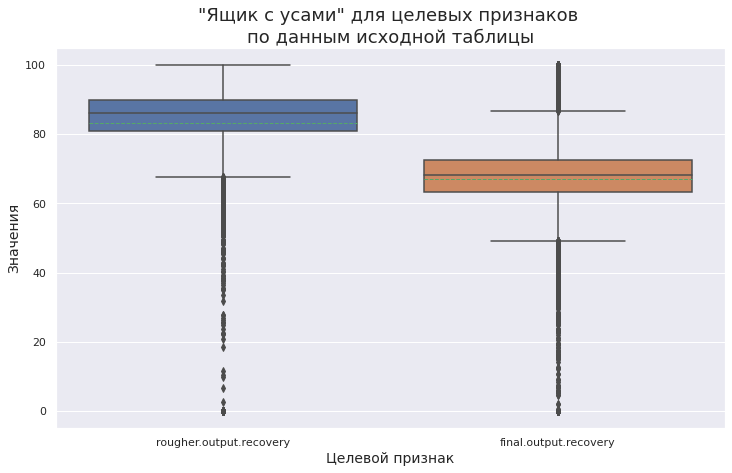

In [68]:
# визуализируем статистику по целевым параметрам:
sns.set(rc={'figure.figsize': (12, 7)})
ax = sns.boxplot(x="variable",
                 y="value",
                 data=pd.melt(targets),
                 showmeans=True,
                 meanline=True)
ax.axes.set_title(
    '"Ящик с усами" для целевых признаков \nпо данным исходной таблицы',
    fontsize=18)
ax.set_xlabel("Целевой признак", fontsize=14)
ax.set_ylabel("Значения", fontsize=14)
pyplot.show()

In [69]:
# проверим наличие пропусков: 
targets.isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

#### Разделение целевых признаков на обучающую и валидационную выборки

In [70]:
target_train = targets.loc[features_train.index]
target_test = targets.loc[features_test.index]

In [71]:
target_test_1 = target_test['rougher.output.recovery']
target_test_2 = target_test['final.output.recovery']

### Расчёт RECOVERY

In [72]:
# формула расчета:
#                  Recovery = ((C * (F - T)) / (F * (C - T))) * 100%

# C = features_train['rougher.output.concentrate_au']
# F = features_train['rougher.input.feed_au']
# T = features_train['rougher.output.tail_au']

features_train['recovery'] = (
    (features_train['rougher.output.concentrate_au'] *
    (features_train['rougher.input.feed_au'] -
     features_train['rougher.output.tail_au'])) /
    (features_train['rougher.input.feed_au'] *
    (features_train['rougher.output.concentrate_au'] -
     features_train['rougher.output.tail_au']))) * 100

### Расчёт MAE

In [73]:
recovery_mae = mean_absolute_error(features_train['rougher.output.recovery'], features_train['recovery'])
print(round(recovery_mae, 3))

0.0


### Признаки, отсутствующие в тестовой выборке

In [74]:
set(initial_df.columns).difference(set(features_test.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

### *__Промежуточные выводы__*

1. MAE 0.0 говорит о том, что в среднем ошибка между расчетным значением recovery и значением признака близка к нулю. Значит значение расчитано верно.
2. Подготовлены три датафрейма для дальнейшей обработки пропусков. 
Пропуски обработаем на исходной таблице. Тестовую и обучающую выборки обновим после обработки пропусков в исходной таблице.
3. Обучающая выборка и исходные данные содержат столбцы с расчетными данными, которые не нужны для обучения модели. 
4. Тестовая выборка не содержит части данных, присутствующих в исходном датафрейме и обучающей выборке. Анализ отсутствующих столбцов указывает на то, что в тестовой выборке отсутствуют столбцы, содержащие расчетные данные, и столбцы, содержащие данные о параметрах выходящих продуктов после каждого этапа обработки. 

### Предобработка данных

#### Избавляемся от ненужных столбцов в исходной таблице

In [75]:
initial_df = initial_df.loc[:, features_test.columns]

#### Избавляемся от пропусков

In [76]:
# рассмотрим столбцы, содержащие пропуски: 
display(initial_df.isna().sum())

primary_cleaner.input.sulfate                  24
primary_cleaner.input.depressant               37
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                104
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                        11
rougher.input.feed_size                       145
rougher.input.feed_sol                         99
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              34
rougher.input.floatbank10_xanthate              8


#### Рассмотрим корреляции параметров исходного датафрейма

In [77]:
# построим функцию для графического отражения корреляции параметров в зависимости от этапа обработки:
def df_corr_visual(df, stage):
    fig, ax = pyplot.subplots(figsize=(12, 8))
    sns.heatmap(df.loc[:, [x for x in df.columns
                           if stage in x]].corr(method='pearson'),
                annot=False,
                cmap='coolwarm',
                annot_kws={"fontsize": 8})
    ax.set_title(f'Тепловая карта корреляции параметров этапа {stage}',
                 fontsize=20)

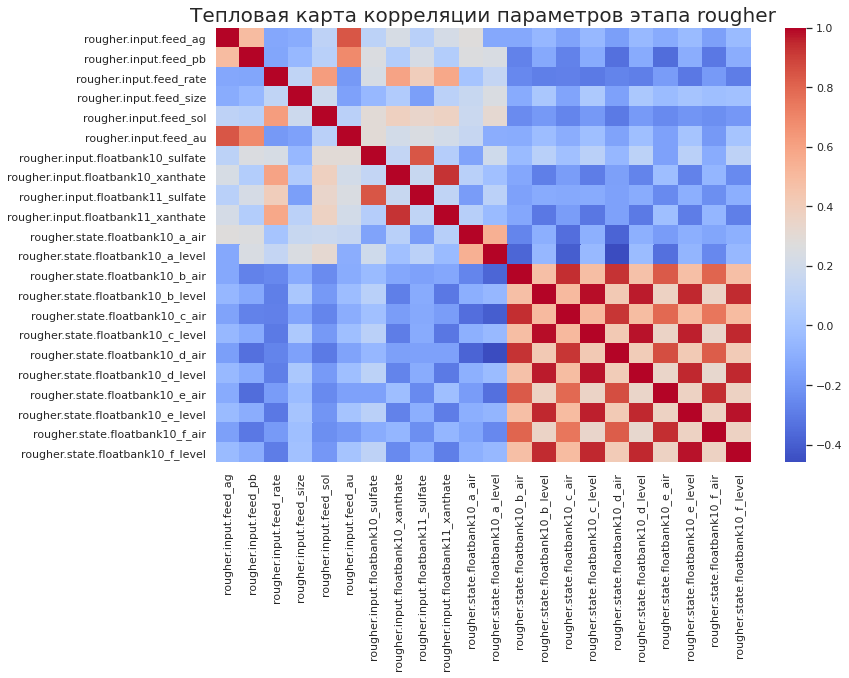

In [78]:
df_corr_visual(initial_df, 'rougher')

In [79]:
# рассмотрим пропуски значений этапа флотации: 
initial_df.loc[:, [x for x in initial_df.columns if 'rougher' in x]].isna().sum()

rougher.input.feed_ag                   0
rougher.input.feed_pb                 100
rougher.input.feed_rate                11
rougher.input.feed_size               145
rougher.input.feed_sol                 99
rougher.input.feed_au                   0
rougher.input.floatbank10_sulfate      34
rougher.input.floatbank10_xanthate      8
rougher.input.floatbank11_sulfate      44
rougher.input.floatbank11_xanthate    453
rougher.state.floatbank10_a_air         1
rougher.state.floatbank10_a_level       1
rougher.state.floatbank10_b_air         1
rougher.state.floatbank10_b_level       1
rougher.state.floatbank10_c_air         1
rougher.state.floatbank10_c_level       1
rougher.state.floatbank10_d_air         0
rougher.state.floatbank10_d_level       0
rougher.state.floatbank10_e_air       436
rougher.state.floatbank10_e_level       0
rougher.state.floatbank10_f_air         0
rougher.state.floatbank10_f_level       0
dtype: int64

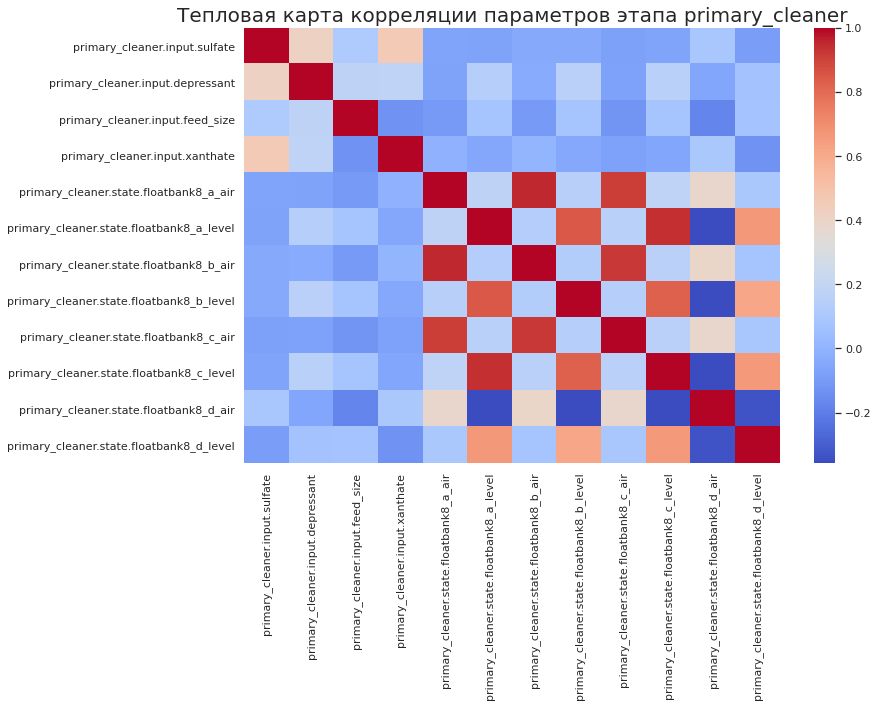

In [80]:
df_corr_visual(initial_df, 'primary_cleaner')

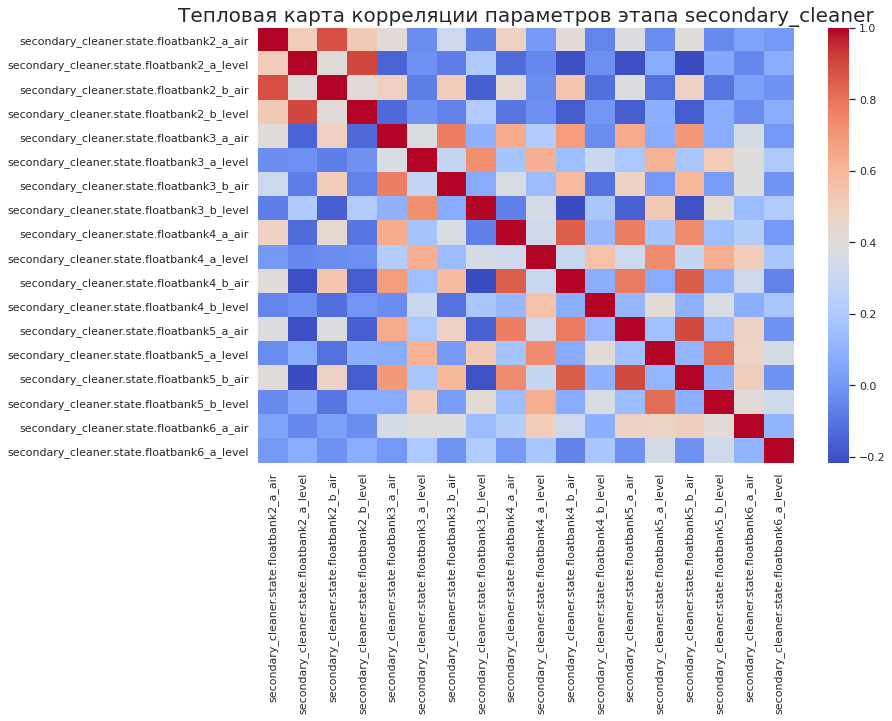

In [81]:
df_corr_visual(initial_df, 'secondary_cleaner')

Text(0.5, 1.0, 'Корреляция параметров исходного файла')

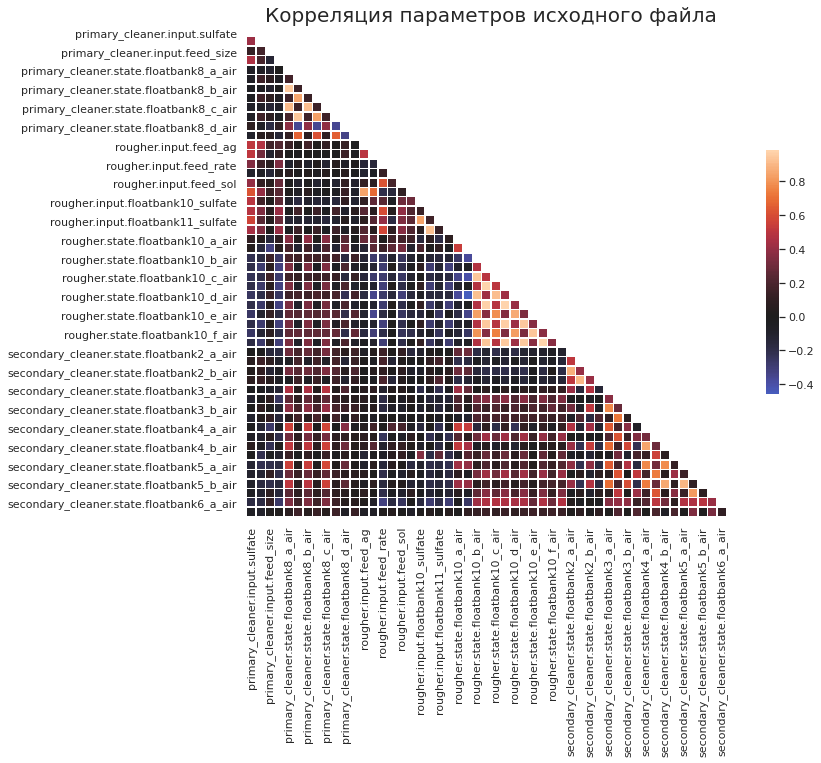

In [82]:
# рассчитаем корреляцию параметров:
corr = initial_df.corr()

# создадим маску верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype=bool))

# зададим размеры фигуры matplotlib
sns.set_theme(style="white")
f, ax = pyplot.subplots(figsize=(11, 9))


# создадим тепловую карту: 
sns.heatmap(corr,
            mask=mask,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})
ax.set_title(f'Корреляция параметров исходного файла',
             fontsize=20)

#### Промежуточные выводы

За редким исключением параметры слабо коррелируют между собой. Исключение составляют параметры, связанные с настройками флотационных установок, корреляция между которыми крайне разнится в зависимости от этапа обработки сырья, что потребует отбросить часть данных параметров по каждому этапу и проведению анализа корреляции на полученном датафрейме. <br>Так как речь в данном проекте идет об обработке руды, то логика такого производства подразумевает, что сырье поступает с рудников. При чем в близкие промежутки времени сырье будет поступать с одного и того же рудника. А значит будет обладать примерно схожими характеристиками. Поэтому наиболее логичным выглядит заполнение пропусков предыдущими значениями. 

In [83]:
# заменим пропуски предыдущими значениями: 
initial_df = initial_df.fillna(method='ffill')

In [84]:
# проверим наличие пропусков: 
initial_df.isna().sum().sum()

0

#### Удаление расчетных столбцов

In [85]:
# напишем функцию для удаления колонок по части наименования: 
def drop_column(df, part_of_column_name): 
    df.drop(df.loc[:, [x for x in df.columns if part_of_column_name in x]], axis=1, inplace=True)
    return df

#### Обновление тестовой и обучающей выборок

In [86]:
features_train.shape

(14149, 87)

In [87]:
# обновим значения обучающей выборки: 
features_train = initial_df.loc[features_train.index, initial_df.columns]

In [88]:
# обновим значения тестовой выборки: 
features_test = initial_df.loc[features_test.index, features_test.columns]

In [89]:
print(
    f'Размеры обучающей выборки: {features_train.shape}, \nРазмеры тестовой выборки: {features_test.shape}, \nРазница между количеством строк исходных данных и суммой строк обучающей и тестовой выборок: {initial_df.shape[0] - features_train.shape[0] - features_test.shape[0]}'
)

Размеры обучающей выборки: (14149, 52), 
Размеры тестовой выборки: (5290, 52), 
Разница между количеством строк исходных данных и суммой строк обучающей и тестовой выборок: 0


In [90]:
# проверим полученный результат: 
features_train.isnull().sum().sum(), features_test.isnull().sum().sum()

(0, 0)

## Анализ данных

### Изменение концентрации металлов на различных этапах очистки

Построим функцию, получающую на вход датафрейм, код этапа и наименование требуемого химического элемента, для построения простого линейного графика по каждому из этапов обработки.

In [91]:
def concentrations_plot(df, metal, stage):
    '''
    возможные значения аргумента stage:
    0 - все этапы обработки
    1 - rougher / флотация
    2 - primary_cleaner / первичная очистка
    3 - secondary_cleaner / вторичная очистка
    4 - final / финальные характеристики
    '''
    stage_dict = {
        1: 'rougher',
        2: 'primary_cleaner',
        3: 'secondary_cleaner',
        4: 'final',
    }
    
    f, ax = pyplot.subplots(figsize=(12, 6))
    ax.set_xlabel("Дата", fontsize=14)
    ax.set_ylabel(f"Содержание элемента {str(metal).upper()}, %", fontsize=14)
    

    if stage == 0:
        sns.lineplot(data=df[[x for x in df.columns if metal in x and 'concentrate_' in x]])
        ax.set_title(
            f'Концентрация элемента {str(metal).upper()} на всех этапах обработки',
            fontsize=18)
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    else:
        sns.lineplot(data=df[
            [x for x in df.columns if metal in x and 'concentrate_' in x and stage_dict[stage] in x]])
        ax.set_title(
            f'Концентрация элемента {str(metal).upper()} на этапе {stage_dict[stage].upper()}',
            fontsize=18)
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Изменение концентрации: __Золото__

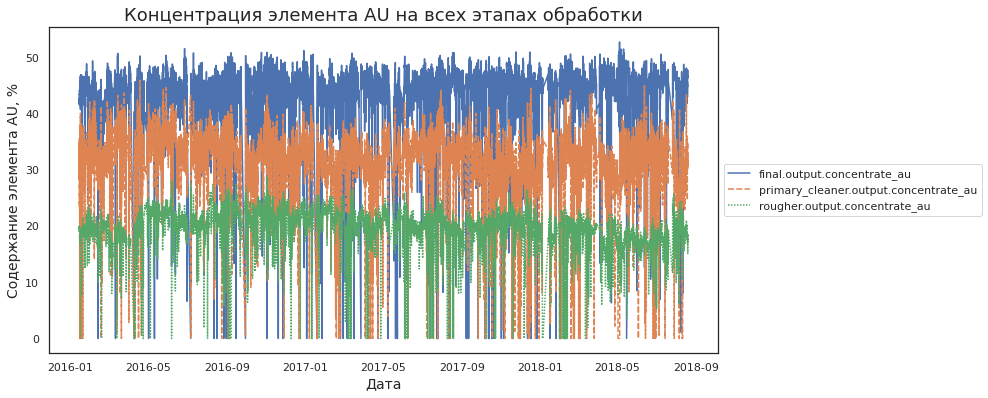

In [92]:
concentrations_plot(df_list[2], metal='au', stage=0)

#### Изменение концентрации: __Серебро__

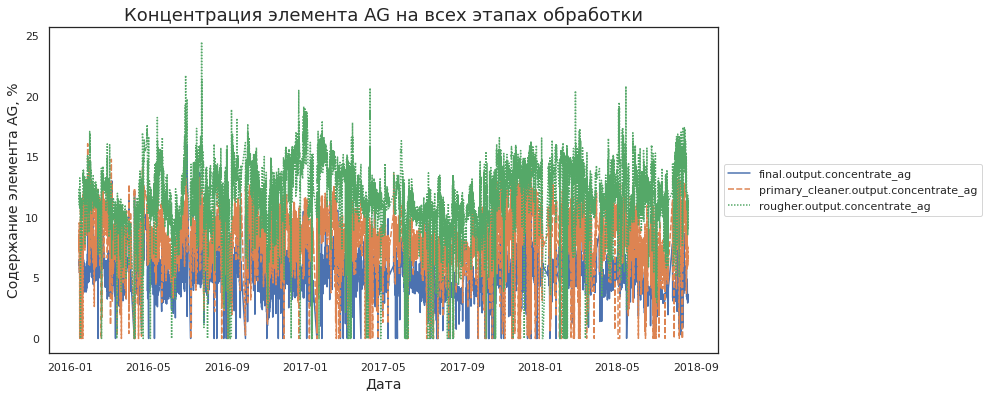

In [93]:
concentrations_plot(df_list[2], metal='ag', stage=0)

#### Изменение концентрации: __Свинец__

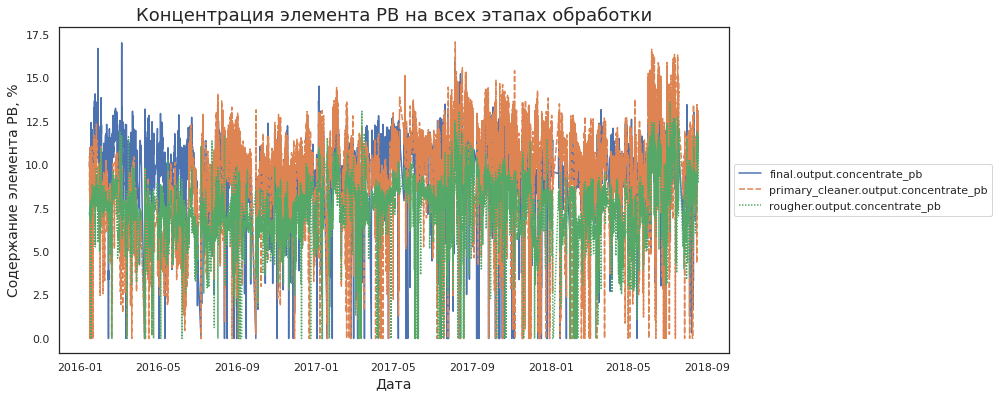

In [94]:
concentrations_plot(df_list[2], metal='pb', stage=0)

#### _Промежуточные выводы_

1. Данные не содержат информации о выходе металлов на этапе вторичной обработки. 
2. Концентрация золота растет по мере прохождения этапов очистки, что в целом логично. Концентрация серебра и свинца при этом достаточно равномерна и даже может увеличиваться. 
3. Данные содержат достаточно большое количество строк с нулевыми значениями по металлам, что свидетельствует о переработке пустой породы в случае, если содержание всех металлов равно нулю. Эти данные требуют дальнейшего анализа и сравнения с данными о поставках сырья с рудников на соответствующие даты. 

### Распределения размеров гранул сырья на обучающей и тестовой выборках

In [95]:
# получим размеры гранул на обучающей выборке: 
training_granules = features_train[[
    x for x in features_train.columns if 'feed_size' in x
]]

In [96]:
# добавим столбец с маркером выборки:
training_granules.insert(2, 'training_set', 1)

In [97]:
# получим размеры гранул на тестовой выборке: 
test_granules = features_test[[
    x for x in features_test.columns if 'feed_size' in x
]]

In [98]:
# добавим столбец с маркером выборки:
test_granules.insert(2, 'training_set', 0)

In [99]:
# объединим датафреймы:
granules_df = pd.concat([test_granules, training_granules], keys=['test', 'train'])

In [100]:
# проверим полученный результат:
granules_df.head()

primary_cleaner.input.feed_size  \
     date                                                   
test 2016-09-01 00:59:59                            8.080   
     2016-09-01 01:59:59                            8.080   
     2016-09-01 02:59:59                            7.787   
     2016-09-01 03:59:59                            7.640   
     2016-09-01 04:59:59                            7.530   

                          rougher.input.feed_size  training_set  
     date                                                        
test 2016-09-01 00:59:59                   62.710             0  
     2016-09-01 01:59:59                   61.961             0  
     2016-09-01 02:59:59                   66.904             0  
     2016-09-01 03:59:59                   59.866             0  
     2016-09-01 04:59:59                   63.315             0

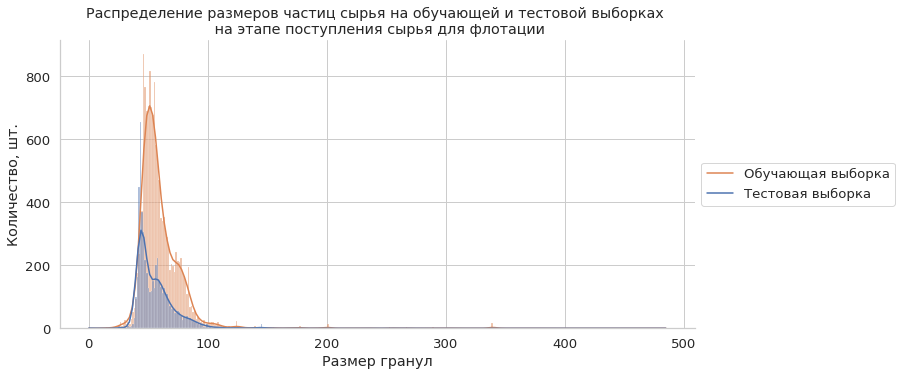

In [101]:
# построим график распределений для этапа флотации:
sns.set_theme(style="whitegrid", font_scale=1.2)
sns.displot(
    x='rougher.input.feed_size',
    hue='training_set',
    kde=True,
    data=granules_df,
    height=5,
    aspect=2,
    legend=False
).set(
    title='Распределение размеров частиц сырья на обучающей и тестовой выборках \n на этапе поступления сырья для флотации',
    xlabel='Размер гранул',
    ylabel='Количество, шт.')
pyplot.legend(labels=['Обучающая выборка', 'Тестовая выборка'],
              loc='center left',
              bbox_to_anchor=(1.0, 0.5))

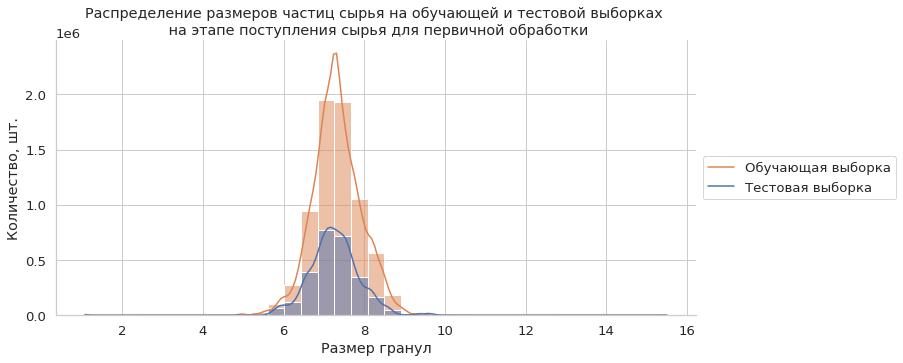

In [102]:
# построим график относительных распределений для этапа первичной обработки:
sns.set_theme(style="whitegrid", font_scale=1.2)
sns.displot(
    x='primary_cleaner.input.feed_size',
    hue='training_set',
    kde=True,
    data=granules_df,
    height=5,
    aspect=2, 
    legend=False, 
    weights=500, 
    bins=35
).set(
    title='Распределение размеров частиц сырья на обучающей и тестовой выборках \n на этапе поступления сырья для первичной обработки',
    xlabel='Размер гранул',
    ylabel='Количество, шт.')
pyplot.legend(labels=['Обучающая выборка', 'Тестовая выборка'],
              loc='center left',
              bbox_to_anchor=(1.0, 0.5));

#### _Промежуточные выводы_

Распределения размеров гранул сырья на каждом этапе не отличаются для обучающей и тетовой выборок. <br>Распределения размеров гранул сырья на этапе первичной обработки свидетельствует о том, что в процессе флотации сырье дробится, затем либо проходит систему сит, либо грануляцию для следующего этапа. 

### Суммарная концентрация веществ на разных этапах очистки

In [103]:
# получим таблицу концентраций из первоначальной обучающей выборки: 
concentrations_df = df_list[0].loc[:, [x for x in df_list[0].columns if 'output.concentrate' in x]]

In [104]:
concentrations_df.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol', 'rougher.output.concentrate_au'],
      dtype='object')

In [105]:
# создадим список этапов и расположим их в логическом порядке: 
stages = list(set([x.split('.')[0] for x in concentrations_df.columns]))
final = stages[0]
stages.pop(0)
stages.append(final)
stages

['final', 'primary_cleaner', 'rougher']

In [106]:
# напишем функцию для расчета концентрации веществ на каждом этапе: 
def stage_materials_calculator(row):
    for stage in stages:
        row[f'{stage} output'] = row[f'{stage}.output.concentrate_ag'] + \
            row[f'{stage}.output.concentrate_pb'] + \
            row[f'{stage}.output.concentrate_sol'] + \
            row[f'{stage}.output.concentrate_au']
    return row

In [107]:
# применим полученную функцию к датафрейму:
concentrations_df = concentrations_df.apply(stage_materials_calculator, axis=1)

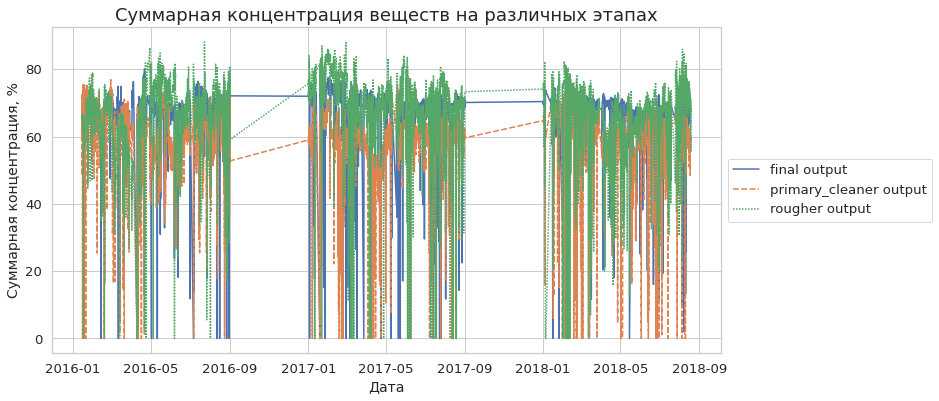

In [108]:
# построим график суммарной концентрации веществ на каждом этапе
f, ax = pyplot.subplots(figsize=(12, 6))
ax.set_xlabel("Дата", fontsize=14)
ax.set_ylabel(f"Суммарная концентрация, %", fontsize=14)

sns.lineplot(data=concentrations_df.iloc[: , 12:])
ax.set_title('Суммарная концентрация веществ на различных этапах', fontsize=18)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### _Промежуточные выводы_

Часть строк содержит аномалии - суммарная концентрация веществ равна 0.
<br>Это в большей степени относится к обучающей выборке, т.е. тестовая не содержит части этих данных. 
Для корректного обучения модели эти аномалии необходимо удалить. 

In [109]:
# отбросим все строки в которых суммарная концентрация на каком-либо этапе равна или менее нуля: 
for stage in stages:
    concentrations_df.drop(
        concentrations_df.index[concentrations_df[f'{stage} output'] <= 0],
        inplace=True)

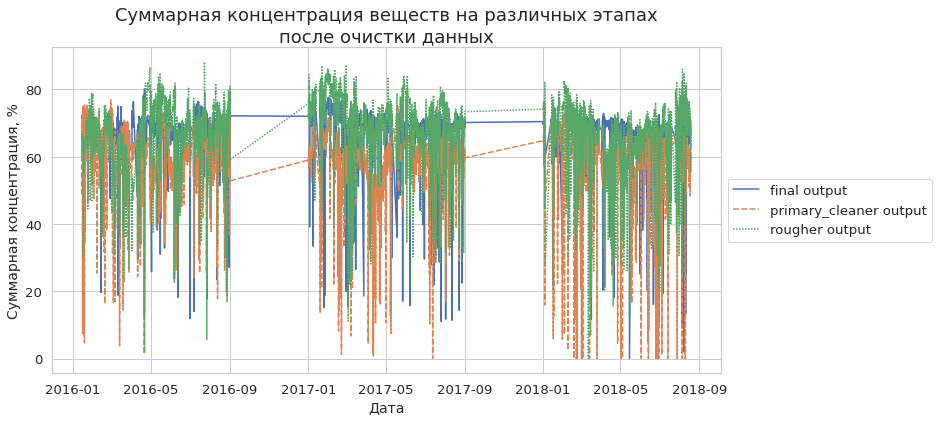

In [110]:
# проверим полученный результат, вновь построив график: 
f, ax = pyplot.subplots(figsize=(12, 6))
ax.set_xlabel("Дата", fontsize=14)
ax.set_ylabel(f"Суммарная концентрация, %", fontsize=14)

sns.lineplot(data=concentrations_df.iloc[: , 12:])
ax.set_title('Суммарная концентрация веществ на различных этапах\nпосле очистки данных', fontsize=18)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

#### Корректировка обучающей выборки и целевых признаков

In [111]:
# откорректируем обучающую выборку и ее целевые признаки согласно последним изменениям:
features_train, targets_train = features_train.loc[
    concentrations_df.index, :], target_train.loc[concentrations_df.index, :]

In [112]:
# проверим полученный результат
features_train.shape, targets_train.shape

((13725, 52), (13725, 2))

In [113]:
# разобьем целевые значения обучающей выборки: 
target_train_1 = targets_train.iloc[:, 0]
target_train_2 = targets_train.iloc[:, 1]

In [114]:
targets_train.columns

Index(['rougher.output.recovery', 'final.output.recovery'], dtype='object')

## Модель

### Функция для вычисления итоговой sMAPE

In [115]:
def smape(target, predict):
    return (abs(target - predict) / ((abs(target) + abs(predict)) / 2)).mean()
smape_score = make_scorer(smape, greater_is_better=False)

### Построение модели

#### Линейная регрессия

##### Rougher output recovery

In [116]:
model = LinearRegression()
crossvalidation = cross_val_score(model,
                                  features_train,
                                  target_train_1,
                                  cv=10,
                                  scoring=smape_score)
smape_0 = crossvalidation.mean()

##### Final output recovery

In [117]:
crossvalidation = cross_val_score(model,
                                  features_train,
                                  target_train_2,
                                  cv=10,
                                  scoring=smape_score)
smape_1 = crossvalidation.mean()

##### sMAPE для модели Linear Regression

In [118]:
model.fit(features_train, target_train_1)
predictions_1 = model.predict(features_test)

In [119]:
model.fit(features_train, target_train_2)
predictions_2 = model.predict(features_test)

In [120]:
smape_lm = 0.25 * smape(target_test_1, predictions_1) + 0.75 * smape(
    target_test_2, predictions_2)
print(f'Итоговое sMAPE для модели линейной регрессии {smape_lm}')

Итоговое sMAPE для модели линейной регрессии 0.09342679410425628


#### Дерево решений

##### Rougher output recovery

In [121]:
model = DecisionTreeRegressor(random_state=12345)
depth = range(1, 50)
param_grid = dict(max_depth=depth)
grid = GridSearchCV(model, param_grid, cv=5, scoring=smape_score, n_jobs=-1)
grid.fit(features_train, target_train_1)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': range(1, 50)},
             scoring=make_scorer(smape, greater_is_better=False))

In [122]:
grid.best_score_

-0.07313442159829717

In [123]:
grid.best_params_

{'max_depth': 4}

In [124]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=4, random_state=12345)

In [125]:
best_dt_model_1 = DecisionTreeRegressor(max_depth=4, random_state=12345)
best_dt_model_1.fit(features_train, target_train_1)
predictions_1 = best_dt_model_1.predict(features_test)

##### Final output recovery

In [126]:
model = DecisionTreeRegressor(random_state=12345)
depth = range(1, 50)
param_grid = dict(max_depth=depth)
grid = GridSearchCV(model, param_grid, cv=5, scoring=smape_score, n_jobs=-1)
grid.fit(features_train, target_train_2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': range(1, 50)},
             scoring=make_scorer(smape, greater_is_better=False))

In [127]:
grid.best_score_

-0.09440354196471516

In [128]:
grid.best_params_

{'max_depth': 3}

In [129]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=3, random_state=12345)

In [130]:
best_dt_model_2 = DecisionTreeRegressor(max_depth=3, random_state=12345)
best_dt_model_2.fit(features_train, target_train_2)
predictions_2 = best_dt_model_2.predict(features_test)

##### sMAPE для модели DecisionTreeRegressor

In [131]:
smape_dt = 0.25 * smape(target_test_1, predictions_1) + 0.75 * smape(
    target_test_2, predictions_2)
print(f'Итоговое sMAPE для модели Дерево решений {smape_dt}')

Итоговое sMAPE для модели Дерево решений 0.09610003343873352


#### Случайный лес

##### Rougher output recovery

In [132]:
model = RandomForestRegressor(max_depth=4, random_state=12345)

param_dist = {'n_estimators': list(range(80, 90))}
rand = RandomizedSearchCV(model, param_dist, cv=5, scoring=smape_score, n_iter=5, random_state=12345, verbose=3)
rand.fit(features_train, target_train_1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................................n_estimators=80; total time=  10.7s
[CV 2/5] END ................................n_estimators=80; total time=  12.1s
[CV 3/5] END ................................n_estimators=80; total time=  10.7s
[CV 4/5] END ................................n_estimators=80; total time=  10.7s
[CV 5/5] END ................................n_estimators=80; total time=  10.6s
[CV 1/5] END ................................n_estimators=87; total time=  11.4s
[CV 2/5] END ................................n_estimators=87; total time=  11.3s
[CV 3/5] END ................................n_estimators=87; total time=  11.9s
[CV 4/5] END ................................n_estimators=87; total time=  11.7s
[CV 5/5] END ................................n_estimators=87; total time=  11.6s
[CV 1/5] END ................................n_estimators=83; total time=  14.1s
[CV 2/5] END ................................n_es

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=4,
                                                   random_state=12345),
                   n_iter=5,
                   param_distributions={'n_estimators': [80, 81, 82, 83, 84, 85,
                                                         86, 87, 88, 89]},
                   random_state=12345,
                   scoring=make_scorer(smape, greater_is_better=False),
                   verbose=3)

In [79]:
rand.best_score_

-0.06674173951346532

In [80]:
rand.best_params_

{'n_estimators': 83}

In [81]:
rand.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=83, random_state=12345)

In [82]:
best_rf_model_1 = RandomForestRegressor(max_depth=4, n_estimators=83, random_state=12345)
best_rf_model_1.fit(features_train, target_train_1)
predictions_1 = best_dt_model_1.predict(features_test)

##### Final output recovery

In [ ]:
model = RandomForestRegressor(max_depth=3, random_state=12345)

param_dist = {'n_estimators': list(range(80, 90))}
rand = RandomizedSearchCV(model, param_dist, cv=5, scoring=smape_score, n_iter=5, random_state=12345)
rand.fit(features_train, target_train_2)

In [ ]:
rand.best_score_

In [ ]:
rand.best_params_

In [ ]:
rand.best_estimator_

In [ ]:
best_rf_model_2 = RandomForestRegressor(max_depth=3, n_estimators=80, random_state=12345)
best_rf_model_2.fit(features_train, target_train_2)
predictions_2 = best_dt_model_2.predict(features_test)

##### sMAPE для модели RandomForestRegressor

In [ ]:
smape_rf = 0.25 * smape(target_test_1, predictions_1) + 0.75 * smape(
    target_test_2, predictions_2)
print(f'Итоговое sMAPE для модели Случайный лес {smape_dt}')

## Вывод

In [ ]:
print(min([smape_lm, smape_dt, smape_rf]))

Наименьшее значение метрики sMAPE получено на моделе линейной регрессии. 